# **Breast Cancer Logit Model**

* **Class:** 2- Benign, 4- Malign

## **Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

## **Importing the dataset**

In [3]:
# Gitbhub's repository with the dataset.
url = "https://raw.githubusercontent.com/SantiagoMorenoV/Breast_Cancer_Logit_Model/refs/heads/main/breast-cancer-wisconsin.data"

headers = [
    "Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion",
    "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"
]

data = pd.read_csv(url, header = None, names = headers)

**Note:** Alternatively, you can doownload the data from [Breast Cancer Wisconsin (Original) ](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original "Breast Cancer Wisconsin (Original) ").

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### **Data information**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


According to data documention, all the variables are numerical. However, the `Bare Nuclei` column contains some missing observations marked with "?". I will replace these with **NaN** so Python identifies them as missing values.

In [6]:
data.replace("?", pd.NA, inplace=True)
data["Bare Nuclei"] = pd.to_numeric(data["Bare Nuclei"]).astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           699 non-null    int64
 1   Clump Thickness              699 non-null    int64
 2   Uniformity of Cell Size      699 non-null    int64
 3   Uniformity of Cell Shape     699 non-null    int64
 4   Marginal Adhesion            699 non-null    int64
 5   Single Epithelial Cell Size  699 non-null    int64
 6   Bare Nuclei                  683 non-null    Int64
 7   Bland Chromatin              699 non-null    int64
 8   Normal Nucleoli              699 non-null    int64
 9   Mitoses                      699 non-null    int64
 10  Class                        699 non-null    int64
dtypes: Int64(1), int64(10)
memory usage: 60.9 KB


### **Missing values**

In [7]:
missing_percentage = data.isnull().sum() * 100 / len(data)
for column, percentage in missing_percentage.items():
    print(f'{column}: {percentage:.2f}%')

Sample code number: 0.00%
Clump Thickness: 0.00%
Uniformity of Cell Size: 0.00%
Uniformity of Cell Shape: 0.00%
Marginal Adhesion: 0.00%
Single Epithelial Cell Size: 0.00%
Bare Nuclei: 2.29%
Bland Chromatin: 0.00%
Normal Nucleoli: 0.00%
Mitoses: 0.00%
Class: 0.00%


Except for **Bare Nuclei**, all the other variables do not have missing values. Therefore, I will exclude rows with missing values as data comes from clinical data.

### **Working Dataset** 

In [8]:
dataset = data.dropna()

In [9]:
dataset.shape

(683, 11)

The working dataset has now 683 observations.

Verifying that the working dataset has no missing values.

In [10]:
missing_percentage = dataset.isnull().sum() * 100 / len(data)
for column, percentage in missing_percentage.items():
    print(f'{column}: {percentage:.2f}%')

Sample code number: 0.00%
Clump Thickness: 0.00%
Uniformity of Cell Size: 0.00%
Uniformity of Cell Shape: 0.00%
Marginal Adhesion: 0.00%
Single Epithelial Cell Size: 0.00%
Bare Nuclei: 0.00%
Bland Chromatin: 0.00%
Normal Nucleoli: 0.00%
Mitoses: 0.00%
Class: 0.00%


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    Int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: Int64(1), int64(10)
memory usage: 64.7 KB


In [12]:
dataset.head(10)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


### **Explanatory and explained variables**

In [18]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

Separating the data in two **Numpy** arrays: one containing the explanatory variables and the other containing the explained variable (*class*). I used **iloc** because the first column of the dataset is an identifier, which does not make sense to include.

## **Splitting the dataset into Training and Test sets**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

## **Training the Logistic Regression model on the Training set**

### **Evaluating different regularization parameters (**C**) and optimization parameters (**Solver**)**

In [20]:
# Defining a logistic model y its hyperparameters to evaluate with a grid
model = LogisticRegression(random_state = 0, max_iter= 10000)
param_grid = {
    'C': [1, 5, 10, 50, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'] 
}

# Configuring and executing the grid search for Cross-Validation
grid_search = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Obtaining the recommended Hyperparameters
best_params = grid_search.best_params_
print('Recommended hyperparameters:', best_params)

Recommended hyperparameters: {'C': 1, 'solver': 'lbfgs'}


### **Logistic model with the optimized hyperparameters**

In [21]:
# Training the logistic classifier
classifier = LogisticRegression(C = 1,random_state = 0, solver = 'lbfgs')
classifier.fit(X_train, y_train)

LogisticRegression(C=1, random_state=0)

### **Intercept and Coefficients**

In [22]:
# Obtaining the log-odds (intercept and coefficients)
intercept = classifier.intercept_[0]
coef = classifier.coef_[0]

# Odds calculation
odds_intercept = np.exp(intercept)
odds_coef = np.exp(coef)

# Feature names
feature_names = ["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", 
                 "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli"]

# Printing the log-odds
print('------------Log-odds------------\n')
print(f'Intercept: {intercept:.4f}')
for feature, coef in zip(feature_names, coef):
    print(f'Coefficient for {feature}: {coef:.4f}')

# Printing ddd-ratios
print('\n-------------Odds---------------\n')
print(f'Intercept: {odds_intercept:.4f}')
for feature, odds in zip(feature_names, odds_coef):
    print(f'Odds for {feature}: {odds:.4f}')

------------Log-odds------------

Intercept: -9.6057
Coefficient for Clump Thickness: 0.4655
Coefficient for Uniformity of Cell Size: -0.0017
Coefficient for Uniformity of Cell Shape: 0.2187
Coefficient for Marginal Adhesion: 0.2589
Coefficient for Single Epithelial Cell Size: 0.2322
Coefficient for Bare Nuclei: 0.3926
Coefficient for Bland Chromatin: 0.4455
Coefficient for Normal Nucleoli: 0.2814

-------------Odds---------------

Intercept: 0.0001
Odds for Clump Thickness: 1.5928
Odds for Uniformity of Cell Size: 0.9983
Odds for Uniformity of Cell Shape: 1.2445
Odds for Marginal Adhesion: 1.2955
Odds for Single Epithelial Cell Size: 1.2614
Odds for Bare Nuclei: 1.4809
Odds for Bland Chromatin: 1.5613
Odds for Normal Nucleoli: 1.3250


**Warning:** These odds ratios are only for a data science course. They **should not** be used for diagnostic purposes. However, they do have a statistical interpretation, which is one of the goals of this project.

### Interpretation of Odds Ratios

1. **Intercept: 0.0001**
   - This suggests that the baseline odds of the outcome (malignant tumor) are very low when all predictor variables are zero. However, the intercept itself is not usually interpreted in isolation.

2. **Clump Thickness: 1.5928**
   - An odds ratio of 1.5928 indicates that for each unit increase in clump thickness, the odds of the tumor being malignant increase by approximately 59.28%.

3. **Uniformity of Cell Size: 0.9983**
   - An odds ratio of 0.9983 suggests that for each unit increase in the uniformity of cell size, the odds of the tumor being malignant decrease slightly (by about 0.17%). This is very close to 1, suggesting a negligible effect.

4. **Uniformity of Cell Shape: 1.2445**
   - An odds ratio of 1.2445 means that for each unit increase in the uniformity of cell shape, the odds of the tumor being malignant increase by approximately 24.45%.

5. **Marginal Adhesion: 1.2955**
   - An odds ratio of 1.2955 indicates that for each unit increase in marginal adhesion, the odds of the tumor being malignant increase by approximately 29.55%.

6. **Single Epithelial Cell Size: 1.2614**
   - An odds ratio of 1.2614 suggests that for each unit increase in the size of single epithelial cells, the odds of the tumor being malignant increase by approximately 26.14%.

7. **Bare Nuclei: 1.4809**
   - An odds ratio of 1.4809 means that for each unit increase in bare nuclei, the odds of the tumor being malignant increase by approximately 48.09%.

8. **Bland Chromatin: 1.5613**
   - An odds ratio of 1.5613 indicates that for each unit increase in bland chromatin, the odds of the tumor being malignant increase by approximately 56.13%.

9. **Normal Nucleoli: 1.3250**
   - An odds ratio of 1.3250 suggests that for each unit increase in normal nucleoli, the odds of the tumor being malignant increase by approximately 32.50%.

### Summary

Most of the features have odds ratios greater than 1, indicating that increases in these features are associated with higher odds of the tumor being malignant. The only exception is `Uniformity of Cell Size`, which has an odds ratio slightly less than 1, suggesting a very small decrease in the odds of malignancy with increasing uniformity of cell size.

## **Predicting the test set restults**

In [23]:
y_pred = classifier.predict(X_test)

In [24]:
pred_v_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
pred_v_test.head()

,y_test,y_pred
0,2,2
1,2,2
2,4,4
3,4,4
4,2,2


In [25]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pred_v_test = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
# Converting Class values 2 and 4 to  0 y 1
pred_v_test['y_test_bin'] = pred_v_test['y_test'].replace({2: 0, 4: 1})
pred_v_test['y_pred_bin'] = pred_v_test['y_pred'].replace({2: 0, 4: 1})

# Adding the new column with an * to  show wher a predicted value differs from an actual value
pred_v_test['difference'] = pred_v_test.apply(lambda row: '*' if row['y_test_bin'] != row['y_pred_bin'] else '', axis=1)

# Showing it as a dataframe
display(pred_v_test)

,y_test,y_pred,y_test_bin,y_pred_bin,difference
0,2,2,0,0,
1,2,2,0,0,
2,4,4,1,1,
3,4,4,1,1,
4,2,2,0,0,
5,2,2,0,0,
6,2,2,0,0,
7,4,4,1,1,
8,2,2,0,0,
9,2,2,0,0,


## **Confusion Matrix**

In [26]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  3]
 [ 3 47]]


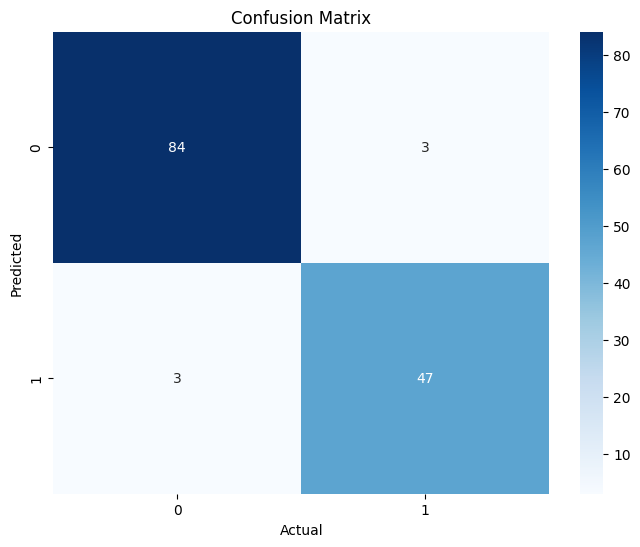

In [27]:
# DataFrame para la matriz de confusión
cm_df = pd.DataFrame(cm)

# Visualindo la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* **TN:** 84 correct predictions of benign tumor
* **FP:** 3 incorrect predictions classified as benign tumor
* **TP:** 47 correct predictions of malignant tumor
* **FN:** 3 incorrect predictions classified as malignant tumor

### **Specificity, Sensitivity and accuracy**

In [28]:
TN, FP, FN, TP = cm.ravel()
# Sensibility and specificity calculation
sensibilidad = (TP / (TP + FN)) * 100
especificidad = (TN / (TN + FP)) * 100
accuracy = ((TP + TN) /(TN + FP + FN + TP) * 100)
print(f'Sensitivity: {sensibilidad:.2f} %')
print(f'Specificity: {especificidad:.2f} %')
print(f'Accuracy: {accuracy:.2f} %')

Sensitivity: 94.00 %
Specificity: 96.55 %
Accuracy: 95.62 %


* **Sensitivity (94.00%):** the loigistic model correctly classifies 94% of the true possitive cases (94% of the malignant class) indicating that the model is good at classifying the condition when it is present.

* **Specificity (96.55%):** the model correctly identifies 95.55% of the true negative cases (benign class). Hihg specificity inidicates that the model is goot at ruling out the condition when it is not present.

* **Accuracy (95.62%):** 95.62% of the total model preditions, both true positive and negative.  

## **ROC Curve**

A Receiver Operating Characteristic (ROC) curve is useful for assessing the performance of a binary classifier across all the possible classification thresholds. 

The ROC depicts the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The TPR (sensitivity) measures the proportion of actual positives correctly classified by the model, while the FPR measures the proportion of actual negatives incorrectly  identified as positives. 

**Interpreting the ROC curve**

* **Axes:** The x-axis represents the FPR (1 - specificity), while the y-axis the TPR (sensitivity).
* **Diagonal line:** when a model does not classify, it will then produce a diagional line (random classifier) from the bottom-left to the top-right corner (with an AUC = 0.5).
* **Area Under the Curve (AUC):** The AUC is a quantification of the ability of the model to discriminate between possitive and negative classes. An AUC = 1 indicates perfect classification, while 0.5 discrimination. 


**Source:** (Google, [Classification: ROC and AUC ](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc))

In [22]:
# Converting y_train and y_test values to {0, 1}
y_train_bin = (y_train == 4).astype(int)
y_test_bin = (y_test == 4).astype(int)

# Fit the model with the binarized data
classifier.fit(X_train, y_train_bin)
y_pred_proba = classifier.predict_proba(X_test)[:, 1]

# Calculating true positive and false positive rates for the ROC curve
fpr, tpr, _ = roc_curve(y_test_bin, y_pred_proba)

# Calculatig the area under the curve (AUC) with more decimals
roc_auc = np.round(auc(fpr, tpr), decimals=6) * 100

print(f'Area under the curve (AUC) with more decimals: {roc_auc} %')

Area under the curve (AUC) with more decimals: 99.5402 %


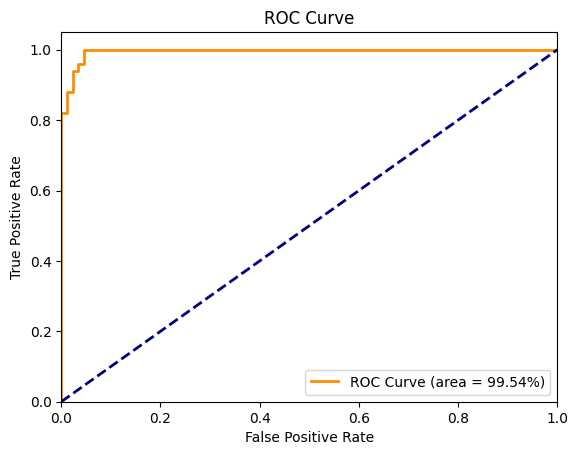

In [23]:
# Visualizing the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.2f}%)')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# **Computing the accuracy with k-Fold Cross Validation**

In [24]:
#from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
print('St. Deviation: {:.2f} %'.format(accuracies.std()*100))
print('Coefficient of Variation: {:.2f} %'.format((accuracies.std() / accuracies.mean()) * 100))

Accuracy: 96.70 %
St. Deviation: 1.97 %
Coefficient of Variation: 2.04 %


# **Brief conclusions**

After conducting a thorough evaluation using the K-Fold cross-validation method, the Logistic Regression classifier achieved an impressive accuracy of 96.70% with a standard deviation of 1.97% and a coefficient of variation of 2.04%. Additionally, the ROC curve AUC was 99.54%, indicating excellent model performance in distinguishing between classes.

Given these results, it was evident that the model did not exhibit signs of overfitting. The accuracy remained consistent across different folds, demonstrating the model’s robustness and generalizability. Consequently, it was determined that hyperparameter engineering for regularization was unnecessary, as the model already displayed optimal performance without overfitting.

**Odd-ratios summary**

Most features exhibit odds ratios greater than 1, indicating that higher values in these features are linked to increased odds of the tumor being malignant. The exception is `Uniformity of Cell Size`, which has an odds ratio just below 1, implying a slight decrease in the likelihood of malignancy as the uniformity of cell size increases.